In [12]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

In [13]:
dataTypes = {
    "disbursed_amount": np.float64,
    "asset_cost": np.float64,
    "ltv": np.float64,
    "branch_id": np.object,
    "supplier_id": np.object,
    "manufacturer_id": np.object,
    "Current_pincode_ID": np.object,
    "State_ID": np.object,
    "Employee_code_ID": np.object,
    "Aadhar_flag": np.uint8,
    "PAN_flag": np.uint8,
    "VoterID_flag": np.uint8,
    "Driving_flag": np.uint8,
    "PRI.NO.OF.ACCTS": np.int64,
    "PRI.ACTIVE.ACCTS": np.int64,
    "PRI.OVERDUE.ACCTS": np.int64,
    "PRI.CURRENT.BALANCE ": np.float64,
    "PRI.SANCTIONED.AMOUNT": np.float64,
    "PRI.DISBURSED.AMOUNT": np.float64,
    "PRIMARY.INSTAL.AMT": np.float64,
    "NEW.ACCTS.IN.LAST.SIX.MONTHS": np.int64,
    "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS": np.int64,
    "AVERAGE.ACCT.AGE": np.int64,
    "CREDIT.HISTORY.LENGTH": np.int64,
    "NO.OF_INQUIRIES": np.int64,
    "Sanctioned": np.float64,
    "AgeAtDisbursal": np.float64,
    "TOTAL.ACTIVE.ACCTS": np.int64,
    "TOTAL.CURRENT.BALANCE": np.float64,
    "TOTAL.DISBURSED.AMOUNT": np.int64,
    "TOTAL.NO.OF.ACCTS": np.int64,
    "TOTAL.OVERDUE.ACCTS": np.int64,
    "TOTAL.CLEAN.ACCTS": np.int64,
    "NO.OF.ACC.BF.SIX.MONTH": np.int64,
    "OVERDUE.ACC.BF.SIX.MONTHS": np.int64,
    "TOTAL.DEACTIVE.ACCTS": np.int64,
    "TOTAL.INSTL.AMOUNT": np.float64,
    "TOTAL.CLEARED.ACCTS": np.int64,
    "Not_Scored": np.uint8,
    "No_History": np.uint8,
    "Very_Low_Risk": np.uint8,
    "Low_Risk": np.uint8,
    "Medium_Risk": np.uint8,
    "Very_High_Risk": np.uint8,
    "Employment.Type_Other": np.uint8,
    "Employment.Type_Salaried": np.uint8,
    "Employment.Type_Self employed": np.uint8,
    "PERFORM_CNS.SCORE_0": np.uint8,
    "PERFORM_CNS.SCORE_3": np.uint8,
    "PERFORM_CNS.SCORE_4": np.uint8,
    "PERFORM_CNS.SCORE_5": np.uint8,
    "PERFORM_CNS.SCORE_6": np.uint8,
    "PERFORM_CNS.SCORE_7": np.uint8,
    "PERFORM_CNS.SCORE_8": np.uint8
}

#Read the input CSV data set
X_train = pd.read_csv("data/X_train.csv", dtype=dataTypes)
X_test = pd.read_csv("data/X_test.csv", dtype=dataTypes)
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

In [14]:
# Instantiate the classifier
gnb = GaussianNB(priors=None, var_smoothing=10e-90)

# Train classifier
gnb.fit(X_train, y_train.values.ravel())

predict_prob = gnb.predict_proba(X_test)

In [15]:
roc_auc_score(y_test, predict_prob[:,1])

0.6013170895282676

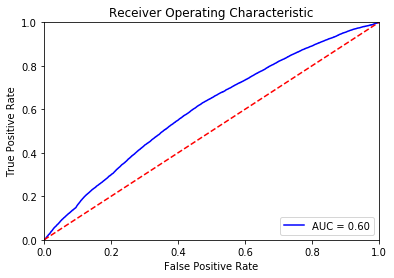

In [17]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()